In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

Reading the data from the csv file

In [55]:
data = pd.read_csv("Assignment3.csv")
data.head()


,x1,x2,x3,x4,x5,y
0,7.11,-447.71,135.66,92.41,96.04,9131.40
1,7.06,-455.33,94.49,91.76,92.16,9001.86
2,6.89,-466.86,186.25,89.54,100.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,9469.94
4,7.24,-445.92,185.90,94.11,88.36,9448.98


Creation of the DataFrame

In [56]:
df = pd.DataFrame({'x1':data.x1,'x2':data.x2,'x3':data.x3,'x4':data.x4,'x5':data.x5,'Y':data.y})
df.head()

,x1,x2,x3,x4,x5,Y
0,7.11,-447.71,135.66,92.41,96.04,9131.40
1,7.06,-455.33,94.49,91.76,92.16,9001.86
2,6.89,-466.86,186.25,89.54,100.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,9469.94
4,7.24,-445.92,185.90,94.11,88.36,9448.98


Function to compute the sum of squared error

In [57]:
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

In [58]:
x = np.array(df[['x1','x2','x3','x4','x5']])
y = np.array(df[['Y']])


In [59]:
regr = linear_model.LinearRegression()

In [60]:
regr.fit(x,y) #Fitting the OLS model with x and y as inputs

LinearRegression()

In [61]:
y_pred = regr.predict(x) # Predicting the output for the given value of x

In [62]:
error = SSE(y,y_pred) 
print("Loss: ",error)

Loss:  71877.84134016866


The Loss: 71877.84134016866 is the Baseline SSE loss. It is high as expected, given that all features are currently being considered, and some may not be contributing to the dependent variable.  Further analysis is needed to better understand the input features and how their transformations contribute to the output.

### EDA: Expolaratory Data Analysis

In [63]:
df.info() 
# Helps us understand the dataset by providing information about each column such as its datatype, missing values etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      101 non-null    float64
 1   x2      101 non-null    float64
 2   x3      101 non-null    float64
 3   x4      101 non-null    float64
 4   x5      101 non-null    float64
 5   Y       101 non-null    float64
dtypes: float64(6)
memory usage: 4.9 KB


In [64]:
df.isnull().sum() # Indicates the Number of missing values in each column

x1    0
x2    0
x3    0
x4    0
x5    0
Y     0
dtype: int64

In [65]:
df.describe() # Provides the Statistics summary of the numeric datatype

,x1,x2,x3,x4,x5,Y
count,101.00,101.00,101.00,101.00,101.00,101.00
mean,7.55,23.76,111.37,98.13,34.00,10244.46
std,0.38,292.85,55.81,4.94,30.56,1022.77
min,6.68,-466.86,9.80,86.83,0.00,8062.54
25%,7.25,-208.89,66.38,94.24,6.76,9469.94
50%,7.53,38.95,104.18,97.90,25.00,10187.66
75%,7.80,262.92,168.16,101.42,57.76,10866.63
max,8.37,546.88,195.81,108.85,100.00,12631.05


Few Inferences from the above Summary:
1. The high standard deviation of 'x2', along with its wide range from -466.86 to 546.88, indicates significant variability and suggests the presence of outliers or a skewed distribution.
2. The standard deviation of 'x1' and 'x4' is low indicating that the values are tightly bound around its mean.
3. The 'x5' values range from 0 to 100 and the mean is at 34, indication the distribution of the data might be right skewed.








### Univariate Analysis: Visualization of the dataset by taking one feature/ variable at a time

The features/ Predictor variables are continuous, therefore the density plot and box provides sufficient insights about distribution of the data and displays the five-number summary (minimum, first quartile, median, third quartile, maximum) and highlights potential outliers respectively.

Text(0.5, 1.0, 'Density Plot of x1')

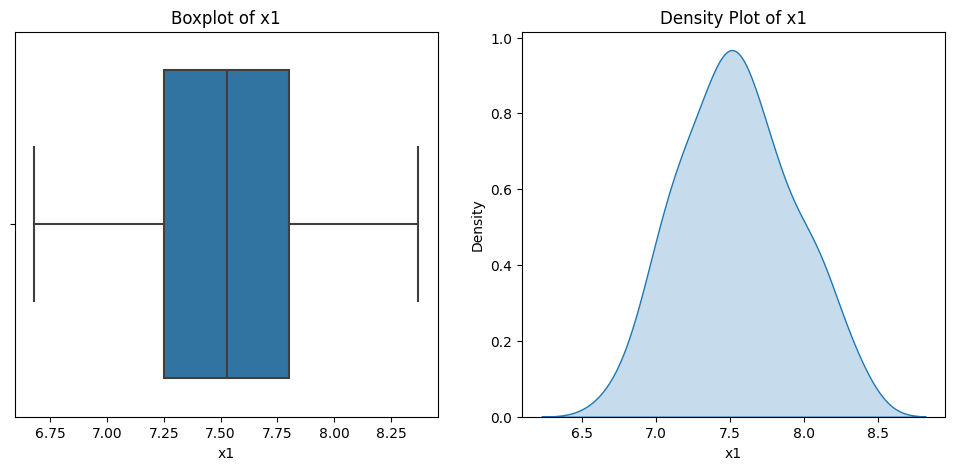

In [13]:
# The predictor variable X1
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df['x1'], ax=axes[0])
axes[0].set_title('Boxplot of x1')

sns.kdeplot(df['x1'], fill=True, ax=axes[1])
axes[1].set_title('Density Plot of x1')



Text(0.5, 1.0, 'Density Plot of x2')

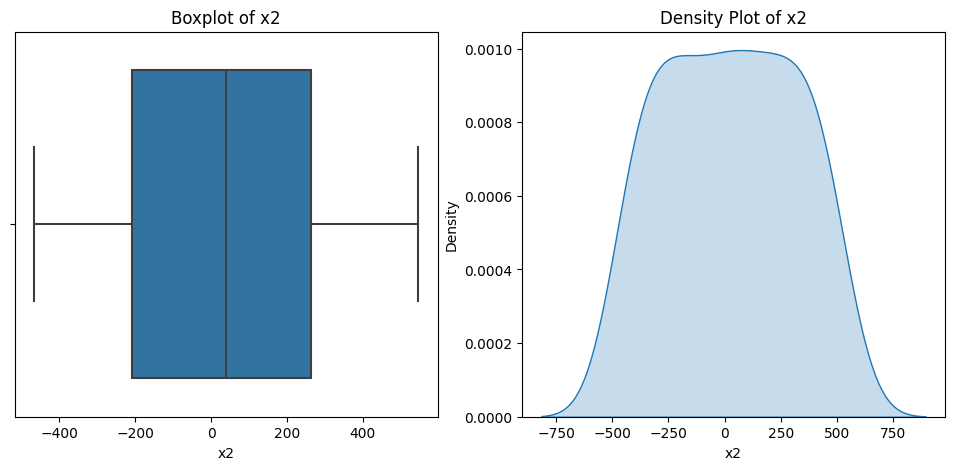

In [16]:
# The predictor variable X2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df['x2'], ax=axes[0])
axes[0].set_title('Boxplot of x2')

sns.kdeplot(df['x2'], fill=True, ax=axes[1])
axes[1].set_title('Density Plot of x2')



Text(0.5, 1.0, 'Density Plot of x3')

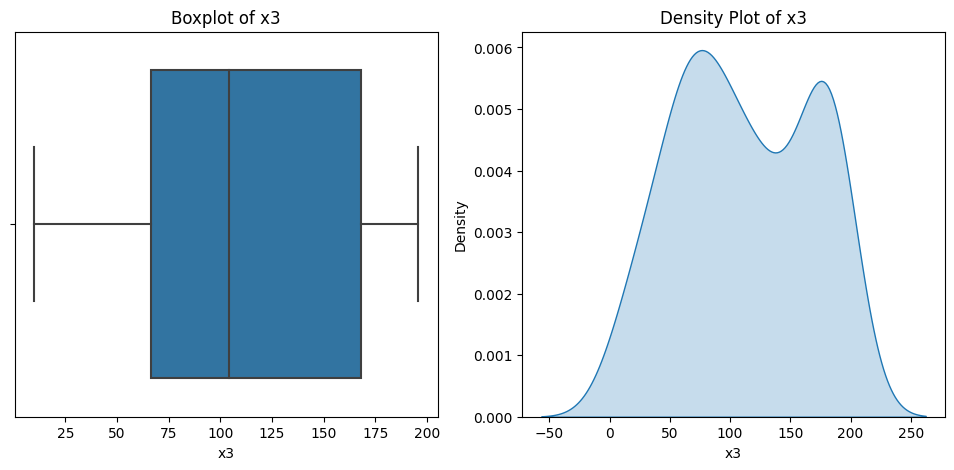

In [17]:
# The predictor variable X3
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df['x3'], ax=axes[0])
axes[0].set_title('Boxplot of x3')

sns.kdeplot(df['x3'], fill=True, ax=axes[1])
axes[1].set_title('Density Plot of x3')



Text(0.5, 1.0, 'Density Plot of x4')

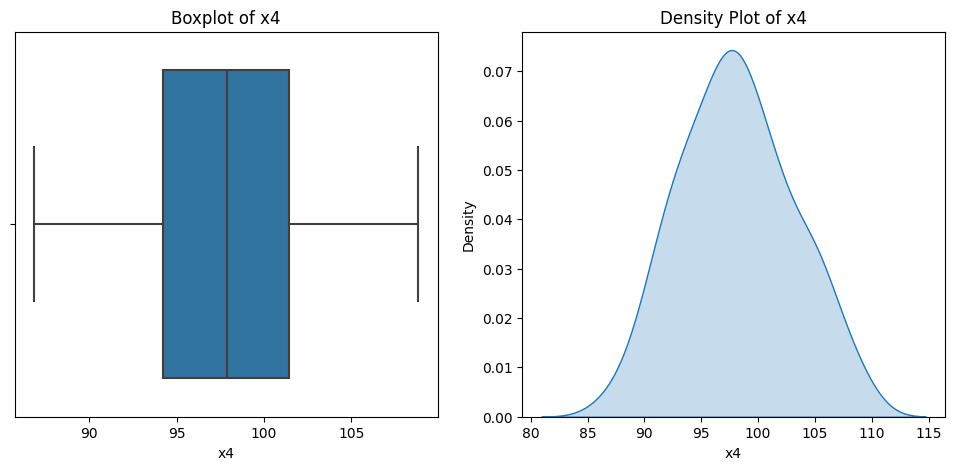

In [18]:
# The predictor variable X4
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df['x4'], ax=axes[0])
axes[0].set_title('Boxplot of x4')

sns.kdeplot(df['x4'], fill=True, ax=axes[1])
axes[1].set_title('Density Plot of x4')



Text(0.5, 1.0, 'Density Plot of x5')

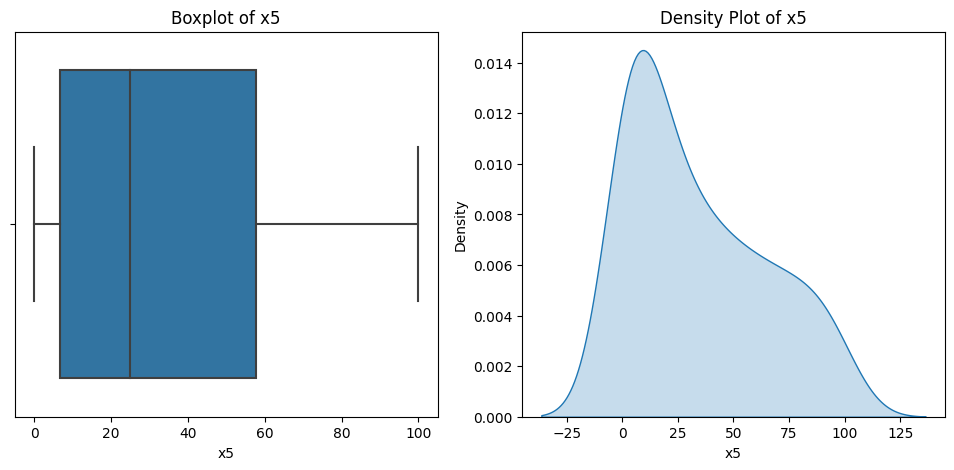

In [19]:
# The predictor variable X5
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df['x5'], ax=axes[0])
axes[0].set_title('Boxplot of x5')

sns.kdeplot(df['x5'], fill=True, ax=axes[1])
axes[1].set_title('Density Plot of x5')



From the plots it is observed that the distribution of x1 and x4 is tightly bound around its mean. The variance of x2 is high reflecting in high spread of data around its mean. The distribution of x5 appears to be right skewed. The distribution of x3 indicates that the data is concentrated around two data points/ mean.

Let's check the correlation between the predictor variables.

In [66]:
cor = np.corrcoef(x.T)
print(cor)
print('\n')
print(cor > 0.8)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.        ]]


[[ True False False  True False]
 [False  True False False False]
 [False False  True False False]
 [ True False False  True False]
 [False False False False  True]]


The variables 'x1' and 'x4' exhibits high correlation between each other.

### The Pair Plot provides insight as to how these predictor variables influence each other and the influence of each predictor variable on the output variable.

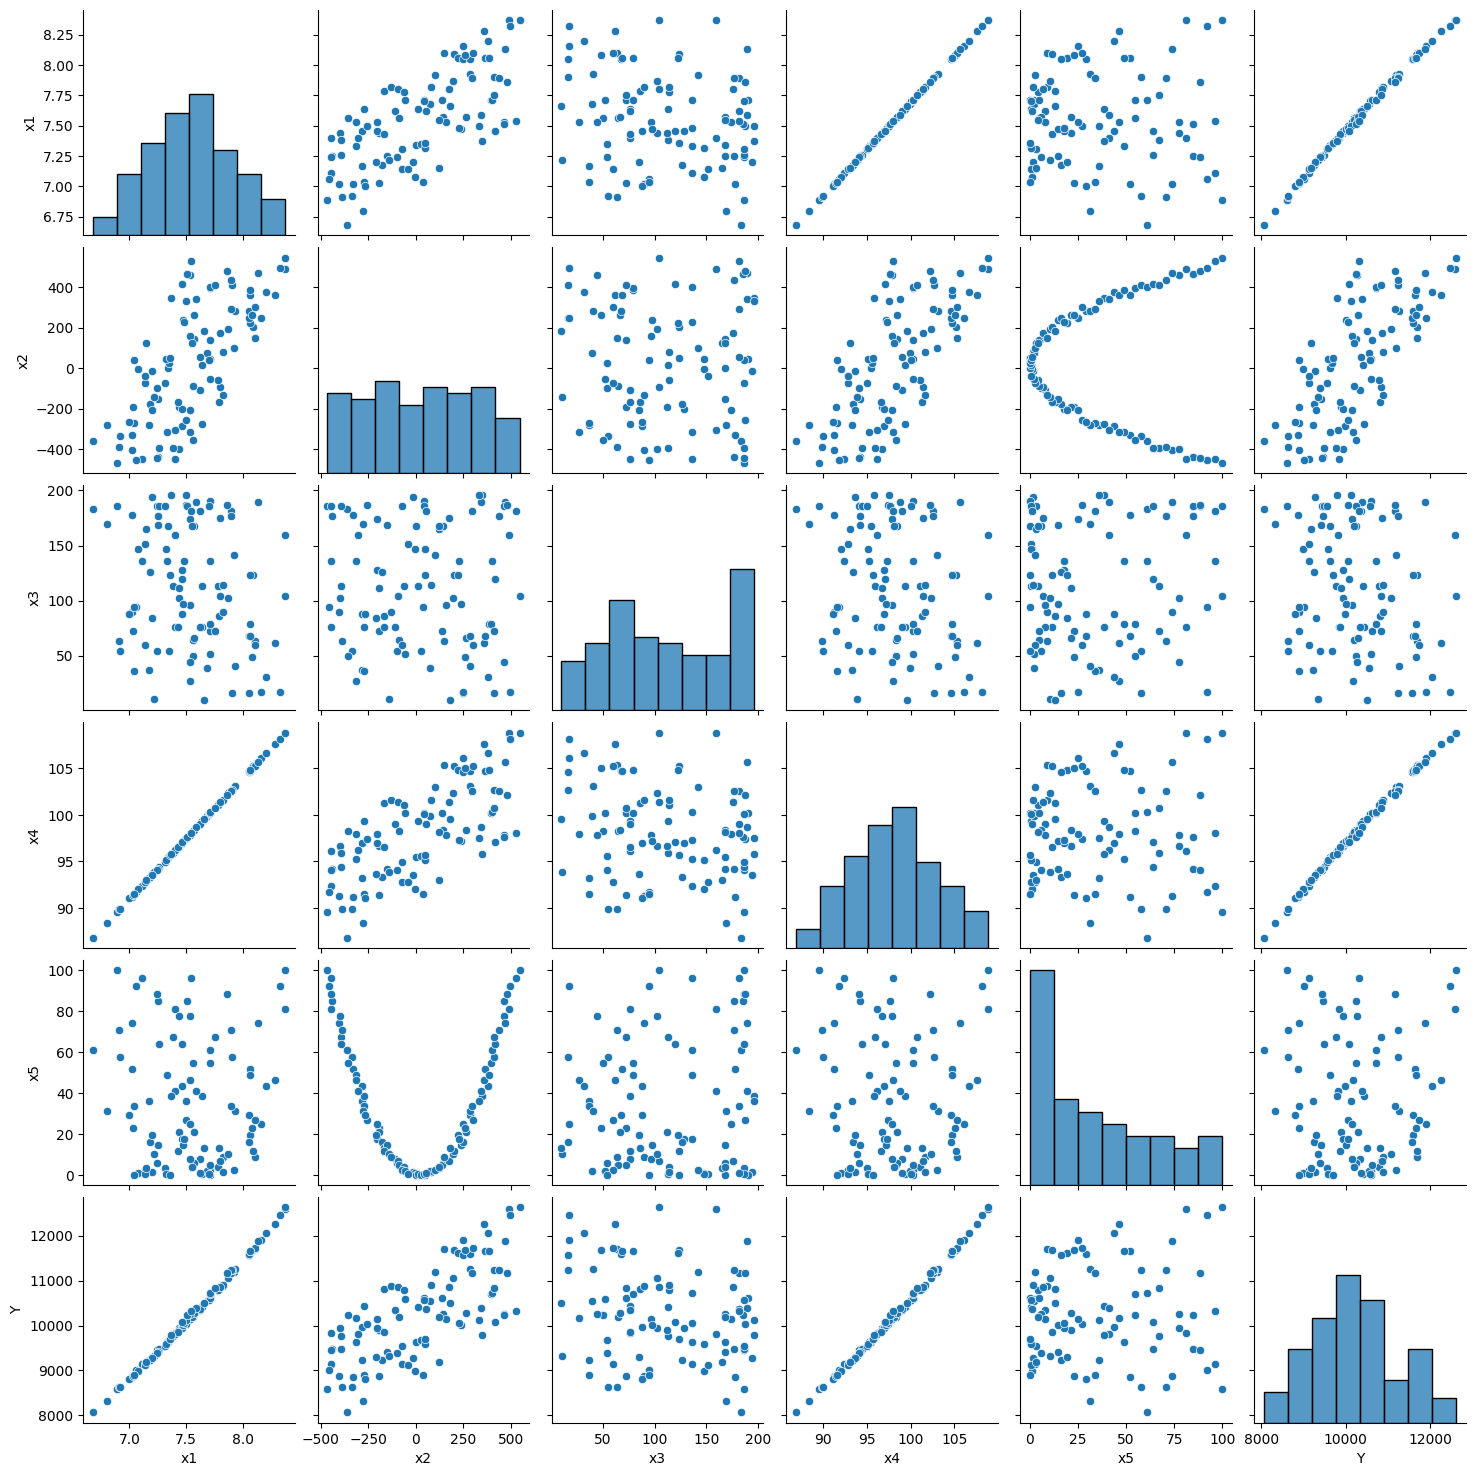

In [67]:
sns.pairplot(df)

The plot indicate that there exhibits a linear relationship between the predictor variables ('x1' and 'x4') and the output.
There exists a parabolic relation between the variables 'x2' and 'x5' and the plot also indicates a possibility of Non linear relationship between the variables 'x3' and 'x5' with the output 'y'.

##### Constructing a new dataframe(df1) by considering the features x1, x2, x4 and x5. x1 and x4 exhibit a strong linear relationship with the output y.    x2 and x5 are interacting terms exhibiting parabolic relation. Considering the second order degree of the term x1/x4 which is hinted by the polynomial fit of degree(2) for the data. The product of the interacting terms is also considered as it helps in modeling by capturing relationships between variables that aren't simply additive. Interaction terms allow a model to account for the combined effect of two or more variables when those variables influence the outcome in a non-linear way when considered together.

Text(0.5, 1.0, 'Scatter Plot of x2 * x5 vs Y')

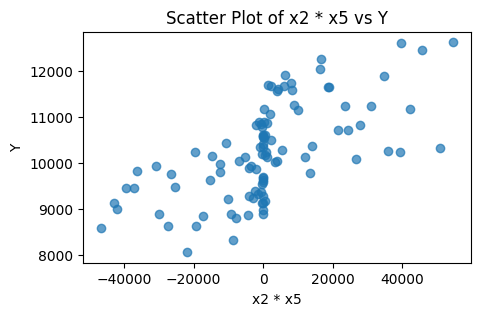

In [68]:
plt.figure(figsize=(5, 3))  
plt.scatter(df.x2*df.x5, y, alpha=0.7)
plt.xlabel('x2 * x5')
plt.ylabel('Y')
plt.title('Scatter Plot of x2 * x5 vs Y')


The above plot exhibits a linear trend and the product of these two features will provide value insight into fitting the data.

##### Considering the second degree of x1 and product of x2 and x5 along with other features to model the data.

In [69]:
df1 = pd.DataFrame({'x1':data.x1**2,'x2':data.x2,'x4':data.x4,'x5':data.x5,'x6':data.x2*data.x5,'Y':data.y})
df1.head()

,x1,x2,x4,x5,x6,Y
0,50.55,-447.71,92.41,96.04,-42998.07,9131.40
1,49.84,-455.33,91.76,92.16,-41963.21,9001.86
2,47.47,-466.86,89.54,100.00,-46686.00,8595.85
3,52.56,-440.53,94.24,84.64,-37286.46,9469.94
4,52.42,-445.92,94.11,88.36,-39401.49,9448.98


In [70]:
X = np.array(df1[['x1','x2','x6','x4','x5']])
Y = np.array(df[['Y']])


In [71]:
Reg = linear_model.LinearRegression()

In [72]:
Reg.fit(X,Y)

LinearRegression()

In [73]:
Y_pred = Reg.predict(X)
print("SSE After Feature selection and transformation: ",SSE(y,Y_pred))

SSE After Feature selection and transformation:  4015.0324679034266


##### There is a significant drop in SSE from 71k to 4k, which provides insight that model is able to fit and predict better on the data than just fitting the OLS model directly on raw data.

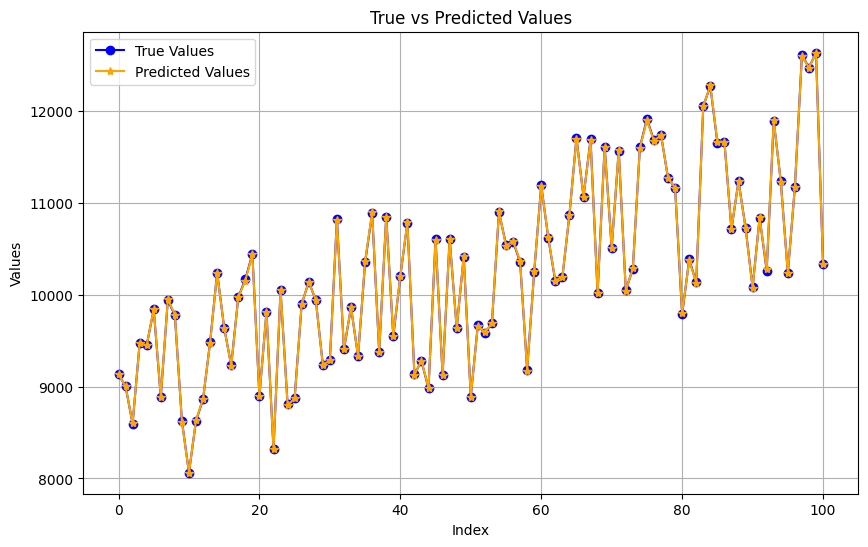

In [74]:
plt.figure(figsize=(10, 6))  

plt.plot(range(len(y)), y, label='True Values', color='blue', linestyle='-', marker='o')
plt.plot(range(len(Y_pred)), Y_pred, label='Predicted Values', color='orange', linestyle='-', marker='*')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('True vs Predicted Values')

plt.legend()

plt.grid(True)


#### To Cross validate to check if the model is overfitting

In [75]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X,Y, test_size=0.2,random_state=42)

In [76]:
Reg.fit(X_train,Y_train)
Y_train_predict = Reg.predict(X_train)
Y_val = Reg.predict(X_validate)
print("SSE After Feature selection and transformation for train set: ",SSE(Y_train,Y_train_predict))
print("SSE After Feature selection and transformation for validation set: ",SSE(Y_validate,Y_val))

SSE After Feature selection and transformation for train set:  3030.448145031652
SSE After Feature selection and transformation for validation set:  1092.1746434899453


The errors are close enough and this model along with selected features and their transformations provides improved performance compared to the OLS fit on the raw data.

#### From observing the coefficients of features from the polynomial fit, it is observed that the x4^2 term has lesser weight than x1^2 and it exhibits a strong relationship with the output Y. Considering the second degree of x4 and product of x2 and x5 along with other features to model the data.

In [77]:
df2 = pd.DataFrame({'x1':data.x1,'x2':data.x2,'x4':data.x4**2,'x5':data.x5,'x6':data.x2*data.x5,'Y':data.y})
df2.head()

,x1,x2,x4,x5,x6,Y
0,7.11,-447.71,8539.61,96.04,-42998.07,9131.40
1,7.06,-455.33,8419.90,92.16,-41963.21,9001.86
2,6.89,-466.86,8017.41,100.00,-46686.00,8595.85
3,7.25,-440.53,8881.18,84.64,-37286.46,9469.94
4,7.24,-445.92,8856.69,88.36,-39401.49,9448.98


In [78]:
X1 = np.array(df2[['x1','x2','x6','x4','x5']])
Y1 = np.array(df[['Y']])


In [79]:
Reg1 = linear_model.LinearRegression()

In [80]:
Reg1.fit(X1,Y1)

LinearRegression()

In [81]:
Y_pred_1 = Reg1.predict(X1)
print("SSE After Feature selection and transformation: ",SSE(y,Y_pred_1))

SSE After Feature selection and transformation:  44.865871575867466


#### The SSE here is better than the previous transformation and much closer to the polynomial fit results.

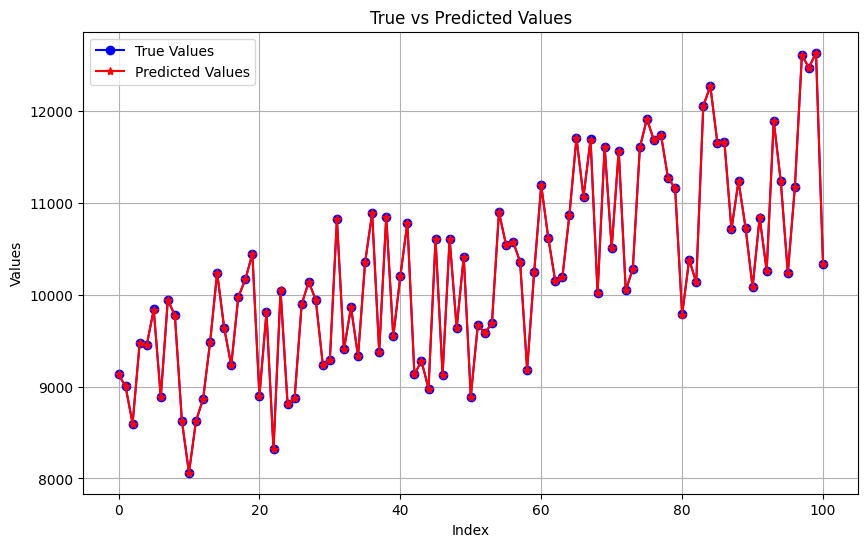

In [82]:
plt.figure(figsize=(10, 6))  

plt.plot(range(len(y)), y, label='True Values', color='blue', linestyle='-', marker='o')
plt.plot(range(len(Y_pred_1)), Y_pred_1, label='Predicted Values', color='red', linestyle='-', marker='*')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('True vs Predicted Values')

plt.legend()

plt.grid(True)


#### To Cross validate to check if the model is overfitting¶

In [83]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X1,Y1, test_size=0.2,random_state=42)

In [84]:
Reg.fit(X_train,Y_train)
Y_train_predict = Reg.predict(X_train)
Y_val = Reg.predict(X_validate)
print("SSE After Feature selection and transformation for train set: ",SSE(Y_train,Y_train_predict))
print("SSE After Feature selection and transformation for validation set: ",SSE(Y_validate,Y_val))

SSE After Feature selection and transformation for train set:  35.70071138615971
SSE After Feature selection and transformation for validation set:  9.814123778699045


### Fitting the Model using the LazyRegressor

In [85]:
from lazypredict.Supervised import LazyRegressor


In [86]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)


In [87]:
models, predictions = reg.fit(X,X,Y,Y)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 37.99it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 101, number of used features: 5
[LightGBM] [Info] Start training from score 10244.460319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [88]:
print(models.RMSE)

Model
DecisionTreeRegressor               0.00
ExtraTreeRegressor                  0.00
ExtraTreesRegressor                 0.00
GaussianProcessRegressor            0.00
XGBRegressor                        0.06
GradientBoostingRegressor           4.39
OrthogonalMatchingPursuitCV         6.30
RANSACRegressor                     6.30
TransformedTargetRegressor          6.30
LinearRegression                    6.30
LassoLarsIC                         6.30
Lars                                6.30
BayesianRidge                       6.31
LassoLarsCV                         6.31
HuberRegressor                      6.31
LassoLars                           6.49
Lasso                               6.64
LassoCV                             6.64
RidgeCV                            10.93
PoissonRegressor                   11.00
SGDRegressor                       13.88
PassiveAggressiveRegressor         14.95
Ridge                              15.00
RandomForestRegressor              30.62
BaggingReg

1. From the above data regarding the loss of each model fit on the same data on which the simple OLS model/ Linear regression model is fit, it can be noticed that the losses vary over a large range of values and this is due to the inherent  differences in how each model learns from the data, makes predictions, and handles complexity.
2. The models assumes certain properties or distribution of the data and if the assumption turns out to be false then the model performance degrades. There exsists bias/ variance trade off. The model should be fine tuned inorder to obtain the optimal performance.
3. Handling Noise: Some models handle noise better than others. For instance, Tree-based models and Boosting models can filter out noise to some extent, while Linear models can suffer if the data is noisy.
4. The model would require hyper parameter tuning in order to perform better on the given data, else the model performance degrades. Simpler models like Linear Regression or Ridge do not have many hyperparameters to tune, but their performance is often limited by the assumptions of linearity.  Regularization techniques (L1/L2) control the complexity of the model and help avoid overfitting. Over Regularization can result in underfitting, which leads to higher errors.
5. When data exhibits non-linear relationships between features and the target variable, models that inherently handle non-linearity (like decision trees, boosting methods, or neural networks) tend to perform better. For models that assume linear relationships (such as linear regression, Lasso, Ridge, etc.), the performace is improved by transforming the features to better model the non-linear patterns.
6. Therefore the OLS model performace, fit on the selected features and their respective transformation is at par with most of the models and even better when compared to the model performace listed by the LazyRegressor function.  